In [1]:
import pandas as pd

df = pd.read_csv('202303 SQSE India Code Test Data.csv')

In [2]:
df.head()

,x,y
0,9.096218,78311.16075
1,14.637429,103897.66450
2,12.255808,97836.26101
3,7.215160,80550.25638
4,6.905628,68555.82096


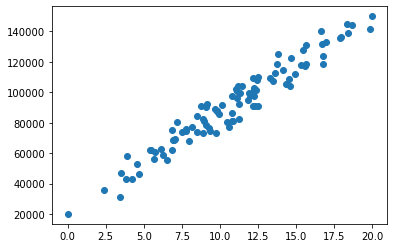

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [6]:
X_train

32     6.238924
6      6.534503
3      7.215160
12     4.216463
51     4.698453
        ...    
79    10.820209
87    13.610841
67    11.229860
24    13.743326
8     11.451010
Name: x, Length: 70, dtype: float64

In [7]:
y_train

32     59042.68150
6      55778.01999
3      80550.25638
12     43282.85645
51     46071.12990
          ...     
79     97468.27209
87    112452.52450
67     82720.34225
24    118663.17130
8     103966.61860
Name: y, Length: 70, dtype: float64

In [8]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

/Users/poulamidash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/poulamidash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/poulamidash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [9]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    21055.038400
x         6449.415777
dtype: float64

In [10]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1232.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.67e-45
Time:                        11:23:54   Log-Likelihood:                -711.67
No. Observations:                  70   AIC:                             1427.
Df Residuals:                      68   BIC:                             1432.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.106e+04   2028.642     10.379      0.000     1.7e+04    2.51e+04
x           6449.4158    183.743     35.100      0.000    6082.763    6816.069
==============================================================================
Omnibus:                        1.623   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.281
Skew:                          -0.120   Prob(JB):                        0.527
Kurtosis:                       2.382   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

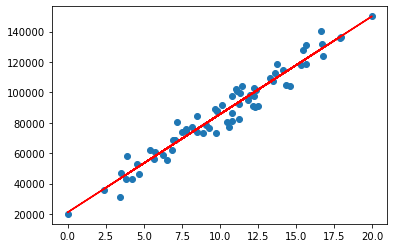

In [11]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.106e+04 + 6449.4158*X_train, 'r')
plt.show()

In [12]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

/Users/poulamidash/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


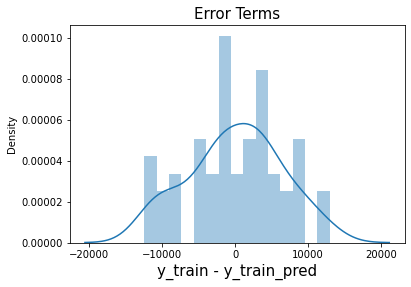

In [14]:
# Plotting the histogram using the residual values
import seaborn as sns
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

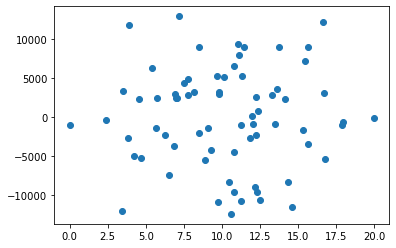

In [15]:
plt.scatter(X_train,res)
plt.show()

In [16]:
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

/Users/poulamidash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


37     78553.573548
62    121495.526895
26    141511.988907
41    100039.414425
35    101714.373429
25    110131.503573
36     93189.441945
33     99451.148120
77    114747.782491
21    140044.011262
85     81251.537921
50     65070.426498
92     72371.404147
69    139286.270112
96     79635.062181
78    129141.420744
72     91115.935166
5     101208.368390
40    117539.066099
11     92731.246296
29    130332.332971
83     60698.706298
82     85288.702126
43    149271.431107
28     80031.676576
22     77620.214741
23     97710.133039
90     56310.431983
86     78977.498458
20    115514.038999
dtype: float64

In [17]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9005182571952658

## The scatter-plot with best-fit line looks like below:

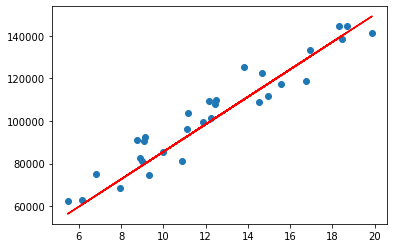

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()